In [12]:
import pandas as pd

import sys
import os

# Add the 'utils' folder to the module search path
utils_path = os.path.abspath(os.path.join('utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils import myutils

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [2]:
# Define schema
schema = {
    'id_claim_hash': 'str',
    'claim_type': 'str',
    'claim_status': 'str',
    'claim_status_des': 'str',
    'work_hours': 'float64',
    'vin_hash': 'str',
    'product_division': 'str',
    'business_unit_des': 'str',
    'region': 'str',
    'country': 'str',
    'id_failure': 'str',
    'component': 'str',
    'component_des': 'str',
    'item_type': 'str',
    'id_causal_part_hash': 'str',
    'id_part_number_hash': 'str',
    'part_number_des': 'str',
    'cd_decision': 'str',
    'decision_des': 'str',
    'amount': 'float64',
    'cd_dealer_hash': 'str'
}


file_path = '../dati/processed/filtered_data.csv'

# Read the CSV file with the defined schema
df = pd.read_csv(file_path, dtype=schema)

df.head(3)

,id_claim_hash,claim_type,claim_status,claim_status_des,work_hours,failure_date,vin_hash,product_division,business_unit_des,region,country,id_failure,component,component_des,item_type,id_causal_part_hash,id_part_number_hash,part_number_des,cd_decision,decision_des,amount,cd_dealer_hash
0,c2d120b2b92069f2162a59eb0d3a80265278da6abd29a6b29e773d82e3cbb4a3,ZW02,Z011,Dual claim,NaN,2021-02-19,33f1bbdd2a721342cdf4dd445d1c7f83d6eaf6a70220998c2bf49f7c3b952c6e,TRUCK,COMMERCIAL VEHICLES B.U.,Europe,Germany,0005507640075,55076,LOCKS,FR,86c4eebc823eb1e1b8276f4860078cdb8131df52c4c5a67ff11aa4873b9e503c,3fbed647e4ecc7e2d23689bcca2570232cf42ec821cad4285966b58c0436cdfd,-E1,P,Pay,0.0,0a2079ba8f1a4910f976035229e2a8b179b3ed5114d5cc037350738414b9ae3c
1,e6b7ba80f1c81d065a93ee4b8731160f5fe2c814c12dce6897fa4868b192c08d,ZW01,Z085,Claim rejected,0.5,2021-04-19,9f5f059b2b17ad5e330b6b8fe42cf686357c9f82ca6c9f56f5bd1a5ac33f8713,TRUCK,BU TRUCKS -HEAVY RANGE,Europe,France,0005073860081,50738,LNG PRESSURE REDUCER,FR,d9685d4413284a71e1ca4aba08468968657c4f3645236bf521deacaa2d1fae05,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,N,Do not pay,37.0,67f0f7f1c4c0e46eab5ec67d23b43ef687b1043932faffb1dfdf5c79e727e65f
2,be895c57c041a7e50e2ad79866f1b112e694e13ed7ab9b65569f2d8bf2da3b16,ZW02,Z080,Claim paid,1.0,2020-05-15,0be8d2e3e2cf3ed084770f7bdf7154e14f15d22e82150abab5ff8e3d1001ef4e,TRUCK,BU TRUCKS -HEAVY RANGE,Europe,France,0005075810721,50758,FUEL PUMP,FR,7e9c47d47a74be3a797838eda09f6c083f92e950b96d348849a7b5bc97c11409,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,92.0,f167ef13472ae9fb00040c777105c255f64990cd14e3501572264e17da58cf58


#### Missing Value

For simplicity, we remove null occurrences. It is advisable to fill null values with constants (if domain knowledge is available) or with predicted values based on other variables

In [3]:
df_cleaned = df.dropna()
print("# occurrences not null: {}".format(df_cleaned.shape[0]))
df_cleaned.head(3)

# occurrences not null: 502543


,id_claim_hash,claim_type,claim_status,claim_status_des,work_hours,failure_date,vin_hash,product_division,business_unit_des,region,country,id_failure,component,component_des,item_type,id_causal_part_hash,id_part_number_hash,part_number_des,cd_decision,decision_des,amount,cd_dealer_hash
1,e6b7ba80f1c81d065a93ee4b8731160f5fe2c814c12dce6897fa4868b192c08d,ZW01,Z085,Claim rejected,0.5,2021-04-19,9f5f059b2b17ad5e330b6b8fe42cf686357c9f82ca6c9f56f5bd1a5ac33f8713,TRUCK,BU TRUCKS -HEAVY RANGE,Europe,France,0005073860081,50738,LNG PRESSURE REDUCER,FR,d9685d4413284a71e1ca4aba08468968657c4f3645236bf521deacaa2d1fae05,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,N,Do not pay,37.0,67f0f7f1c4c0e46eab5ec67d23b43ef687b1043932faffb1dfdf5c79e727e65f
2,be895c57c041a7e50e2ad79866f1b112e694e13ed7ab9b65569f2d8bf2da3b16,ZW02,Z080,Claim paid,1.0,2020-05-15,0be8d2e3e2cf3ed084770f7bdf7154e14f15d22e82150abab5ff8e3d1001ef4e,TRUCK,BU TRUCKS -HEAVY RANGE,Europe,France,0005075810721,50758,FUEL PUMP,FR,7e9c47d47a74be3a797838eda09f6c083f92e950b96d348849a7b5bc97c11409,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,92.0,f167ef13472ae9fb00040c777105c255f64990cd14e3501572264e17da58cf58
3,3feb3068c9b1c2c91b08ec604c3851607788cd44a24cda04ebff80cd7ee20750,ZW02,Z080,Claim paid,1.5,2021-07-20,cfea24bedabb53b81a7c23813b98ba38fd1034f2a9a1aebcee6f8ee2cfa17f6d,TRUCK,COMMERCIAL VEHICLES B.U.,Europe,Germany,0005523100091,55231,CARPETS,FR,01be7eebf877383c8c5f2427a0c84f2d5baeceb6867710ba19168373b5d85b95,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,109.8,04150f2d58835df402f9adf88b89892be6911c7f82e46442603af16300186f2a


#### Feature Engineering

Remove the ID columns that have a corresponding DESC column and the REGION column that is constant

In [4]:

columns_to_drop = ['region', 'claim_status_des','id_part_number_hash','decision_des']
df_dropped = df_cleaned.drop(columns=columns_to_drop)
df_dropped.head(3)

,id_claim_hash,claim_type,claim_status,work_hours,failure_date,vin_hash,product_division,business_unit_des,country,id_failure,component,component_des,item_type,id_causal_part_hash,part_number_des,cd_decision,amount,cd_dealer_hash
1,e6b7ba80f1c81d065a93ee4b8731160f5fe2c814c12dce6897fa4868b192c08d,ZW01,Z085,0.5,2021-04-19,9f5f059b2b17ad5e330b6b8fe42cf686357c9f82ca6c9f56f5bd1a5ac33f8713,TRUCK,BU TRUCKS -HEAVY RANGE,France,0005073860081,50738,LNG PRESSURE REDUCER,FR,d9685d4413284a71e1ca4aba08468968657c4f3645236bf521deacaa2d1fae05,-ECONOMY,N,37.0,67f0f7f1c4c0e46eab5ec67d23b43ef687b1043932faffb1dfdf5c79e727e65f
2,be895c57c041a7e50e2ad79866f1b112e694e13ed7ab9b65569f2d8bf2da3b16,ZW02,Z080,1.0,2020-05-15,0be8d2e3e2cf3ed084770f7bdf7154e14f15d22e82150abab5ff8e3d1001ef4e,TRUCK,BU TRUCKS -HEAVY RANGE,France,0005075810721,50758,FUEL PUMP,FR,7e9c47d47a74be3a797838eda09f6c083f92e950b96d348849a7b5bc97c11409,-ECONOMY,P,92.0,f167ef13472ae9fb00040c777105c255f64990cd14e3501572264e17da58cf58
3,3feb3068c9b1c2c91b08ec604c3851607788cd44a24cda04ebff80cd7ee20750,ZW02,Z080,1.5,2021-07-20,cfea24bedabb53b81a7c23813b98ba38fd1034f2a9a1aebcee6f8ee2cfa17f6d,TRUCK,COMMERCIAL VEHICLES B.U.,Germany,0005523100091,55231,CARPETS,FR,01be7eebf877383c8c5f2427a0c84f2d5baeceb6867710ba19168373b5d85b95,-ECONOMY,P,109.8,04150f2d58835df402f9adf88b89892be6911c7f82e46442603af16300186f2a


Let's transform the categorical variables of interest using one-hot encoding. In this initial experiment, we will omit categorical variables with a large number of labels

In [5]:
categorical_cols = ['claim_status', 'claim_type', 'product_division', 'business_unit_des', 'part_number_des', 'cd_decision', 'item_type']
# One-hot encoding of categorical columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_dropped, columns=categorical_cols, dtype='int')

# Display the first rows of the resulting DataFrame
df_encoded.head()


,id_claim_hash,work_hours,failure_date,vin_hash,country,id_failure,component,component_des,id_causal_part_hash,amount,cd_dealer_hash,claim_status_Z002,claim_status_Z005,claim_status_Z010,claim_status_Z011,claim_status_Z012,claim_status_Z013,claim_status_Z014,claim_status_Z015,claim_status_Z021,claim_status_Z026,claim_status_Z027,claim_status_Z030,claim_status_Z031,claim_status_Z032,claim_status_Z035,claim_status_Z037,claim_status_Z070,claim_status_Z075,claim_status_Z076,claim_status_Z080,claim_status_Z084,claim_status_Z085,claim_status_Z092,claim_status_Z094,claim_status_ZT14,claim_type_ZW01,claim_type_ZW02,claim_type_ZW06,product_division_BUS,product_division_TRUCK,business_unit_des_BU TRUCKS -HEAVY RANGE,business_unit_des_BU TRUCKS -MEDIUM RANGE,business_unit_des_BUS DIVISION,business_unit_des_COMMERCIAL VEHICLES B.U.,business_unit_des_OTHERS,part_number_des_-E1,part_number_des_-E3,part_number_des_-ECONOMY,part_number_des_-ECONOMY50,cd_decision_D,cd_decision_N,cd_decision_P,cd_decision_V,item_type_FR,item_type_MAT,item_type_SUBL
1,e6b7ba80f1c81d065a93ee4b8731160f5fe2c814c12dce6897fa4868b192c08d,0.50,2021-04-19,9f5f059b2b17ad5e330b6b8fe42cf686357c9f82ca6c9f56f5bd1a5ac33f8713,France,0005073860081,50738,LNG PRESSURE REDUCER,d9685d4413284a71e1ca4aba08468968657c4f3645236bf521deacaa2d1fae05,37.00,67f0f7f1c4c0e46eab5ec67d23b43ef687b1043932faffb1dfdf5c79e727e65f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,be895c57c041a7e50e2ad79866f1b112e694e13ed7ab9b65569f2d8bf2da3b16,1.00,2020-05-15,0be8d2e3e2cf3ed084770f7bdf7154e14f15d22e82150abab5ff8e3d1001ef4e,France,0005075810721,50758,FUEL PUMP,7e9c47d47a74be3a797838eda09f6c083f92e950b96d348849a7b5bc97c11409,92.00,f167ef13472ae9fb00040c777105c255f64990cd14e3501572264e17da58cf58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,3feb3068c9b1c2c91b08ec604c3851607788cd44a24cda04ebff80cd7ee20750,1.50,2021-07-20,cfea24bedabb53b81a7c23813b98ba38fd1034f2a9a1aebcee6f8ee2cfa17f6d,Germany,0005523100091,55231,CARPETS,01be7eebf877383c8c5f2427a0c84f2d5baeceb6867710ba19168373b5d85b95,109.80,04150f2d58835df402f9adf88b89892be6911c7f82e46442603af16300186f2a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
5,24c363a3b3ff3cbd27bb3e18e20e323c5cca37eb142e4a2707f50d7f94b65963,0.60,2021-05-26,c6db359f31cbfcee0a3488ec26d09d12366b7d6b15009a349b9006440d750a46,France,0005424300401,54243,TURBO CHARGER OIL PIPES,576c23594ba61f454ff8a8d264bce6d3834d34226e0d384633e16324e0574cf4,45.00,76bdabaf2879d68fe3c38982cdb8b9d8286b29d847ec59cda9c837922c0807dc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
6,3ea2f5ccad4dc5c00ca98123991f90bbf80d0a4d7ec0ac7236da9e8ed28b82d2,5.93,2020-04-14,30805300da95bc29c50548dcced4c65be93614f0668f9b52f4e8c7674bdd6131,Belgium,0005305200011,53052,GEAR SELECTOR,a951a120b9ac5f278eb5a51628a97bf5a273546ec1fef408f8086c734736b2c3,404.43,752e3282228fec075eba78866e051566872031d13219c6d665fab2575f9c6594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


The dataset should consider information grouped by id_claim_hash. 

Therefore, we need to group any multiple rows by id_claim:
* For amount and work_hours, we calculate the average and the total.
* For the one-hot encoded variables, we define them as: 1 if at least one occurrence is 1, otherwise 0


In [6]:
# Define the data types for the DataFrame df_encoded
dtypes = dict(zip(df_encoded.columns, df_encoded.dtypes))

# Identify one-hot and numeric columns
one_hot_cols = [col for col, dtype in dtypes.items() if pd.api.types.is_integer_dtype(dtype)]
numeric_cols = [col for col, dtype in dtypes.items() if pd.api.types.is_numeric_dtype(dtype) and col not in one_hot_cols]

# Grouping columns
group_by_cols = [
    'id_claim_hash',
    'cd_dealer_hash',
    'failure_date',
    'vin_hash',
]

# Prepare aggregations for one-hot columns
one_hot_agg = df_encoded.groupby(group_by_cols)[one_hot_cols].max().reset_index()

# Prepare aggregations for numeric columns
numeric_agg_sum = df_encoded.groupby(group_by_cols)[numeric_cols].sum().add_prefix('total_').reset_index()
numeric_agg_mean = df_encoded.groupby(group_by_cols)[numeric_cols].mean().add_prefix('mean_').reset_index()

# Combine all aggregations
df_grouped = pd.merge(one_hot_agg, numeric_agg_sum, on=group_by_cols)
df_grouped = pd.merge(df_grouped, numeric_agg_mean, on=group_by_cols)

# Print the grouped DataFrame
df_grouped.head()

,id_claim_hash,cd_dealer_hash,failure_date,vin_hash,claim_status_Z002,claim_status_Z005,claim_status_Z010,claim_status_Z011,claim_status_Z012,claim_status_Z013,claim_status_Z014,claim_status_Z015,claim_status_Z021,claim_status_Z026,claim_status_Z027,claim_status_Z030,claim_status_Z031,claim_status_Z032,claim_status_Z035,claim_status_Z037,claim_status_Z070,claim_status_Z075,claim_status_Z076,claim_status_Z080,claim_status_Z084,claim_status_Z085,claim_status_Z092,claim_status_Z094,claim_status_ZT14,claim_type_ZW01,claim_type_ZW02,claim_type_ZW06,product_division_BUS,product_division_TRUCK,business_unit_des_BU TRUCKS -HEAVY RANGE,business_unit_des_BU TRUCKS -MEDIUM RANGE,business_unit_des_BUS DIVISION,business_unit_des_COMMERCIAL VEHICLES B.U.,business_unit_des_OTHERS,part_number_des_-E1,part_number_des_-E3,part_number_des_-ECONOMY,part_number_des_-ECONOMY50,cd_decision_D,cd_decision_N,cd_decision_P,cd_decision_V,item_type_FR,item_type_MAT,item_type_SUBL,total_work_hours,total_amount,mean_work_hours,mean_amount
0,000033d421b8e313d9d310f5c33bcbef7e979e85654ba6bbb857a68bda27625d,e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8,2021-11-16,ee3413f99be8410f19c204a0cfd480ab8055c7a5f71cdedcb2fb6a5195b56e1d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0.7,61.46,0.7,61.46
1,0000405d68b5be91184b9f7a026e1270ebea14a1e30d093846bc1df2362c6815,82e0ffc3254bf04327e3541637d4b59f59f9b7241bf732907acd8648b4c7720a,2020-03-02,db9b5f7fb6d3282faf2a47a7d747d2181357abe0ece531d8125395e331889c72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0.4,37.32,0.4,37.32
2,000060ab51ca9327824ddda658b454298ed36b8799f1589eee49481149386da5,90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631,2020-09-23,61b6d2b8ea0c0503754cdbcad8d425f05145f4c655bd07303eee13d3adfd1a46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0.6,28.80,0.6,28.80
3,000080bda782b7aa716599931bab73fb217bb6a4491b1f7e6c81284537eb8cdb,40def02de8ca6f1ae7d0c8668d05b9f97839559e57fbb1c56b19a53a038a7f68,2021-05-06,a1a7b17a1e58d2833b3a121db634e296a3f6eca7dd32dde043104313009c0d87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,2.0,151.80,2.0,151.80
4,0000938a2b4ef274630932521b7c1ea31cceabab6358e842dc4730bab62bcd27,4e30a813b12a86eef5413cc30795b825558f7eb39a7d091d5c3864546e006505,2021-07-13,44f012c9ac988909f53df75eec76993300021d3ad6245d6ef76c042489a9a524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0.5,42.15,0.5,42.15


In [7]:
# Count of distinct occurrences for 'id_claim_hash'
distinct_claims = df_grouped['id_claim_hash'].nunique()
print("# distinct occurrences for ID CLAIM: {}".format(distinct_claims))

# Count of rows in the aggregated DataFrame
total_rows = df_grouped.shape[0]
print("# distinct occurrences in aggregated df: {}".format(total_rows))

# distinct occurrences for ID CLAIM: 411672
# distinct occurrences in aggregated df: 411672


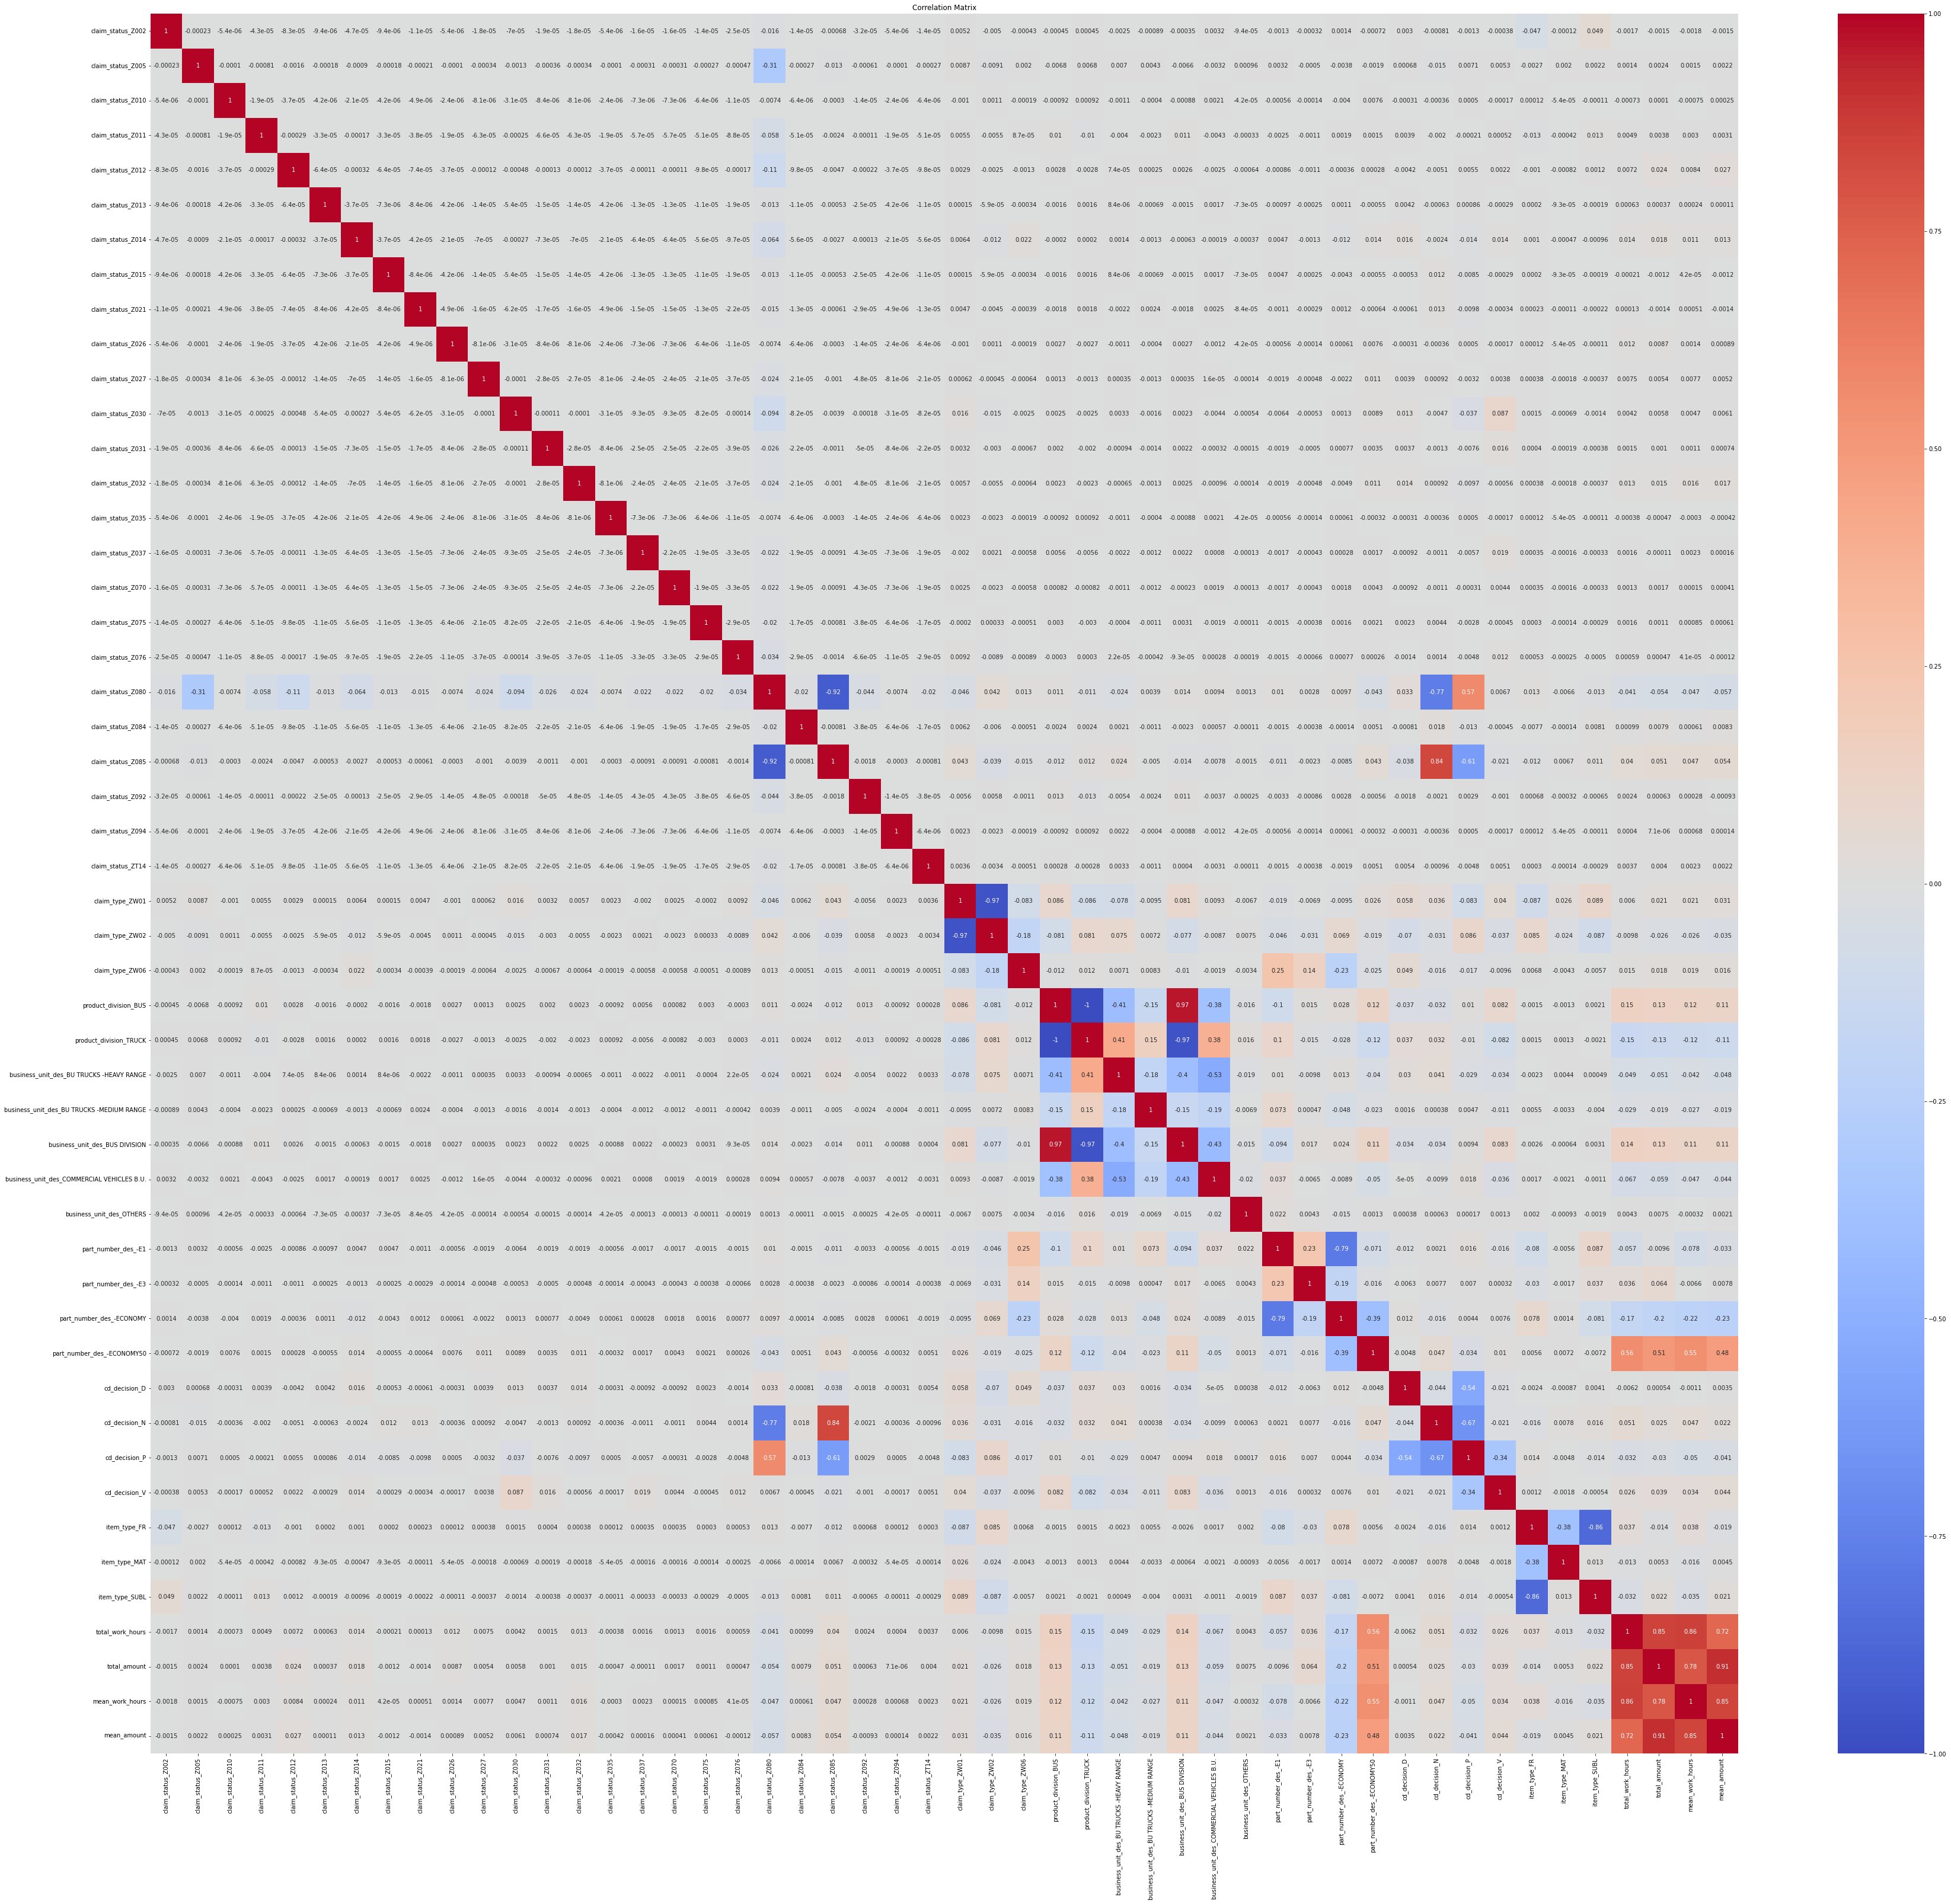

In [8]:
myutils.visualize_correlation_matrix(df_grouped)

From the correlation matrix, it is evident that some variables are highly correlated. Let's identify which combinations produce a high correlation (>0.8) and eliminate one of the two

In [9]:
myutils.check_drop_columns_high_correlation(df_grouped,0.8)

Columns to delete: 
['claim_status_Z085', 'claim_type_ZW02', 'product_division_TRUCK', 'business_unit_des_BUS DIVISION', 'cd_decision_N', 'item_type_SUBL', 'total_amount', 'mean_work_hours', 'mean_amount']


In [10]:

columns_to_drop = ['claim_status_Z085', 'claim_type_ZW02', 'product_division_TRUCK', 'business_unit_des_BUS DIVISION', 'cd_decision_N', 'item_type_SUBL', 'total_amount', 'mean_work_hours', 'mean_amount']
df_end = df_grouped.drop(columns=columns_to_drop)
df_end.head(3)


,id_claim_hash,cd_dealer_hash,failure_date,vin_hash,claim_status_Z002,claim_status_Z005,claim_status_Z010,claim_status_Z011,claim_status_Z012,claim_status_Z013,claim_status_Z014,claim_status_Z015,claim_status_Z021,claim_status_Z026,claim_status_Z027,claim_status_Z030,claim_status_Z031,claim_status_Z032,claim_status_Z035,claim_status_Z037,claim_status_Z070,claim_status_Z075,claim_status_Z076,claim_status_Z080,claim_status_Z084,claim_status_Z092,claim_status_Z094,claim_status_ZT14,claim_type_ZW01,claim_type_ZW06,product_division_BUS,business_unit_des_BU TRUCKS -HEAVY RANGE,business_unit_des_BU TRUCKS -MEDIUM RANGE,business_unit_des_COMMERCIAL VEHICLES B.U.,business_unit_des_OTHERS,part_number_des_-E1,part_number_des_-E3,part_number_des_-ECONOMY,part_number_des_-ECONOMY50,cd_decision_D,cd_decision_P,cd_decision_V,item_type_FR,item_type_MAT,total_work_hours
0,000033d421b8e313d9d310f5c33bcbef7e979e85654ba6bbb857a68bda27625d,e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8,2021-11-16,ee3413f99be8410f19c204a0cfd480ab8055c7a5f71cdedcb2fb6a5195b56e1d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.7
1,0000405d68b5be91184b9f7a026e1270ebea14a1e30d093846bc1df2362c6815,82e0ffc3254bf04327e3541637d4b59f59f9b7241bf732907acd8648b4c7720a,2020-03-02,db9b5f7fb6d3282faf2a47a7d747d2181357abe0ece531d8125395e331889c72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.4
2,000060ab51ca9327824ddda658b454298ed36b8799f1589eee49481149386da5,90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631,2020-09-23,61b6d2b8ea0c0503754cdbcad8d425f05145f4c655bd07303eee13d3adfd1a46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.6


In [11]:
# Specify the path for the output CSV file
csv_file_path = '../dati/processed/fe_data.csv'
csv_directory = os.path.dirname(csv_file_path)
print("Path: {}".format(csv_directory))

# Create the directory if it does not exist
if not os.path.exists(csv_directory):
    os.makedirs(csv_directory)

# Save the DataFrame to the CSV file
df_end.to_csv(csv_file_path, index=False)

Path: ../dati/processed
